In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

## Libraries and Filesystem Setup

In [3]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package punkt to /Users/dkarsann/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dkarsann/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### (already have imported / processed dataframe and stopwords)

## Parsing and Processing Content

In [15]:
df = pd.read_csv('../../processed_files/webis/webis.csv')
df.head()

,file_number,file_type,filename,text,paraphrase
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True


### load stopword lists from MastersProjectStopwords.ipynb

In [16]:
common_stopwords = pickle.load(open("../../processed_files/stopwords/common_stopwords.pickle", "rb"))
corpus_stopwords = pickle.load(open("../../processed_files/stopwords/corpus_stopwords.pickle", "rb"))
combined_stopwords = pickle.load(open("../../processed_files/stopwords/combined_stopwords.pickle", "rb"))
corpus_bigrams = pickle.load(open("../../processed_files/stopwords/corpus_bigrams.pickle", "rb"))
corpus_trigrams = pickle.load(open("../../processed_files/stopwords/corpus_trigrams.pickle", "rb"))

In [17]:
#corpus_bigrams

In [18]:
#corpus_trigrams

In [19]:
df.head()

,file_number,file_type,filename,text,paraphrase
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True


## Merging duplicate domain

In [12]:
#df_merged = pd.DataFrame(df_en.groupby('DOMAIN')['RAW_CONTENT'].agg('sum')).reset_index()
#df_merged.head()

In [20]:
number_files = df['text'].nunique()
number_files

11326

In [21]:
df.shape

(15718, 5)

In [23]:
with open('../../processed_files/webis/df.pickle', 'wb') as file:
    pickle.dump(df, file)

## TEXT Processing

In [24]:
doc_length_list_orig = []
doc_length_list_no_digits = []
doc_length_list_no_tri = []
doc_length_list_no_bi = []
doc_length_list_tokenized = []
doc_length_list_no_stop = []
doc_length_list_stemmed = []

In [27]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english')) 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
from string import digits
remove_digits = str.maketrans('', '', digits)
from IPython.display import display

def process(content):
    
    #--------original--------#
    doc_length_list_orig.append(len(content))
    
    #--------no digits--------#
    processed = content.translate(remove_digits)
    doc_length_list_no_digits.append(len(processed))
    
    #--------lower case--------#
    processed = processed.lower()
    
    # remove punctuation with translation table before trigram step
    
    #--------remove trigrams--------#
    for trigram in corpus_trigrams:
        processed = processed.replace(trigram.lower(), '')
    doc_length_list_no_tri.append(len(processed))

    #--------remove bigrams--------#
    for bigram in corpus_bigrams:
        processed = processed.replace(bigram.lower(), '') 
    doc_length_list_no_bi.append(len(processed))
    
    #--------tokenize--------#
    processed = tokenizer.tokenize(processed)
    doc_length_list_tokenized.append(len(' '.join(processed)))
    
    #--------remove stopwords--------#
    processed = [token for token in processed if token not in stop_words]
    doc_length_list_no_stop.append(len(' '.join(processed)))
    
    #--------stem tokens--------#
    processed = [ps.stem(token) for token in processed]
    doc_length_list_stemmed.append(len(' '.join(processed)))
    
    return processed

In [29]:
df['text_processed'] = df['text'].apply(lambda row: process(row))
df.head()

,file_number,file_type,filename,text,paraphrase,text_processed
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comt, would, advis, irrat, proceed, comt, con..."
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, comt, would, spurn, irrat, reason, howe..."
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[pictur, illustr, shortest, easiest, way, catc..."
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[pictur, exemplifi, straight, easiest, way, re..."
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, cours, bill, go, get, sooner, later, mr..."


In [30]:
df['length'] = df['text_processed'].apply(lambda row: len(row))
df.head()

,file_number,file_type,filename,text,paraphrase,text_processed,length
0,1,original.txt,1-original.txt,M. Comte would not advise so irrational a proc...,True,"[comt, would, advis, irrat, proceed, comt, con...",18
1,1,paraphrase.txt,1-paraphrase.txt,Even M. Comte would spurn such irrational reas...,True,"[even, comt, would, spurn, irrat, reason, howe...",21
2,10,original.txt,10-original.txt,Picture illustrating the shortest and easiest ...,True,"[pictur, illustr, shortest, easiest, way, catc...",23
3,10,paraphrase.txt,10-paraphrase.txt,This picture exemplifies the straight and easi...,True,"[pictur, exemplifi, straight, easiest, way, re...",24
4,100,original.txt,100-original.txt,"Thad, of course. And, Bill, we're going to get...",True,"[thad, cours, bill, go, get, sooner, later, mr...",22


In [31]:
print('doc_length_list_orig: ', sum(doc_length_list_orig) / len(doc_length_list_orig))
print('doc_length_list_no_digits: ', sum(doc_length_list_no_digits) / len(doc_length_list_no_digits))
print('doc_length_list_no_tri average: ', sum(doc_length_list_no_tri) / len(doc_length_list_no_tri))
print('doc_length_list_no_bi: ', sum(doc_length_list_no_bi) / len(doc_length_list_no_bi))
print('doc_length_list_tokenized: ', sum(doc_length_list_tokenized) / len(doc_length_list_tokenized))
print('doc_length_list_no_stop: ', sum(doc_length_list_no_stop) / len(doc_length_list_no_stop))
print('doc_length_list_stemmed: ', sum(doc_length_list_stemmed) / len(doc_length_list_stemmed))

doc_length_list_orig:  1795.8823641684692
doc_length_list_no_digits:  1790.3542435424354
doc_length_list_no_tri average:  1776.1395851889554
doc_length_list_no_bi:  1653.523158162616
doc_length_list_tokenized:  1566.614518386563
doc_length_list_no_stop:  1121.1848835729736
doc_length_list_stemmed:  986.5940323196336


In [32]:
doc_length_list_stemmed.sort()
doc_length_list_stemmed_filtered = [item for item in doc_length_list_stemmed if item > 0 and item < 200]
least_to_most_filtered_plot_items = []
for item in enumerate(doc_length_list_stemmed):
    least_to_most_filtered_plot_items.append(item)

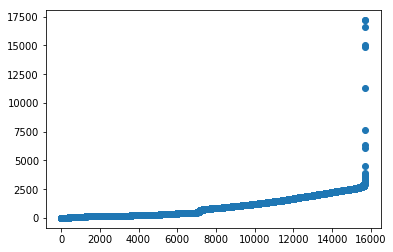

In [36]:
x, y = zip(*least_to_most_filtered_plot_items)
plt.scatter(x, y)
plt.show()

In [38]:
df[df['length'].between(90, 95)].style.set_properties(subset=['text'], **{'width-min': '100px'})

,file_number,file_type,filename,text,paraphrase,text_processed,length
3948,2776,original.txt,2776-original.txt,"Man darf ferner behauften, dass wathrend der ersten vier Jahrhunderte der Kirche kein Lehrer und Keine religiose Genossenschaft, welche sich mit einigem Schein des Rechts als Erben des ursprfinglichen Christenthums betrachten konnten, eine andere Auschauung yon dem Lebensanfang Jesu yon Nazareth gehabt haben, als diese .... Dass die Annahme eines ursprunglichen Christenthums ohne den Glauben an den yon der Jungfrau geborenen Gottessohn Jesus eine Fiktion ist.""--Zahn, Das Apostolische Symbolum, pp. 55-68. -- Opponents of the Virgin-Birth occur, indeed, in the person of Cerinthus, the contemporary of St. John, and later on among the Ebionites, mentioned by Justin Martyr.* But they reject the Virgin-Birth, because they reject the principle of the Incarnation.",False,"['man', 'darf', 'ferner', 'behauften', 'dass', 'wathrend', 'der', 'ersten', 'vier', 'jahrhundert', 'der', 'kirch', 'kein', 'lehrer', 'und', 'kein', 'religios', 'genossenschaft', 'welch', 'sich', 'mit', 'einigem', 'schein', 'de', 'recht', 'al', 'erben', 'de', 'ursprfinglichen', 'christenthum', 'betrachten', 'konnten', 'ein', 'ander', 'auschauung', 'yon', 'dem', 'lebensanfang', 'jesu', 'yon', 'nazareth', 'gehabt', 'haben', 'al', 'dies', 'dass', 'die', 'annahm', 'ein', 'ursprunglichen', 'christenthum', 'ohn', 'den', 'glauben', 'den', 'yon', 'der', 'jungfrau', 'geborenen', 'gottessohn', 'jesu', 'ein', 'fiktion', 'ist', 'zahn', 'dpostolisch', 'symbolum', 'pp', 'oppon', 'virgin', 'birth', 'occur', 'inde', 'person', 'cerinthu', 'contemporari', 'st', 'john', 'later', 'among', 'ebionit', 'mention', 'justin', 'martyr', 'reject', 'virgin', 'birth', 'reject', 'principl', 'incarn']",90
3949,2776,paraphrase.txt,2776-paraphrase.txt,"Man darf ferner behauften, dass wathrend der ersten vier Jahrhunderte der Kirche kein Lehrer und Keine religiose Genossenschaft, welche sich mit einigem Schein des Rechts als Erben des ursprfinglichen Christenthums betrachten konnten, eine andere Auschauung yon dem Lebensanfang Jesu yon Nazareth gehabt haben, als diese .. Dass die Annahme eines ursprunglichen Christenthums ohne den Glauben an den yon der Jungfrau geborenen Gottessohn Jesus eine Fiktion ist.""--Zahn, Das Apostolische Symbolum, pp. 55-68. -- Opponents of the Virgin-Birth occur, indeed, in the person of Cerinthus, the contemporary of St. John, and later on among the Ebionites, mentioned by Justin Martyr.* But they reject the Virgin-Birth, because they reject the principle of the Incarnation.",False,"['man', 'darf', 'ferner', 'behauften', 'dass', 'wathrend', 'der', 'ersten', 'vier', 'jahrhundert', 'der', 'kirch', 'kein', 'lehrer', 'und', 'kein', 'religios', 'genossenschaft', 'welch', 'sich', 'mit', 'einigem', 'schein', 'de', 'recht', 'al', 'erben', 'de', 'ursprfinglichen', 'christenthum', 'betrachten', 'konnten', 'ein', 'ander', 'auschauung', 'yon', 'dem', 'lebensanfang', 'jesu', 'yon', 'nazareth', 'gehabt', 'haben', 'al', 'dies', 'dass', 'die', 'annahm', 'ein', 'ursprunglichen', 'christenthum', 'ohn', 'den', 'glauben', 'den', 'yon', 'der', 'jungfrau', 'geborenen', 'gottessohn', 'jesu', 'ein', 'fiktion', 'ist', 'zahn', 'dpostolisch', 'symbolum', 'pp', 'oppon', 'virgin', 'birth', 'occur', 'inde', 'person', 'cerinthu', 'contemporari', 'st', 'john', 'later', 'among', 'ebionit', 'mention', 'justin', 'martyr', 'reject', 'virgin', 'birth', 'reject', 'principl', 'incarn']",90
4259,2915,paraphrase.txt,2915-paraphrase.txt,"Haddo, the clergyman pulled a bottle of spirits out of the pocket of his long woollen plaid wrap, and offered it to Janet. The two of them sat down on a soft hill of heather and traded the bottle back and forth, taking long sips. There was a boy, Francie, hiding nearby, and, if he had known anything about mythology, he may have mistaken the cleric for the God Pan, and the young woman, who was joking and laughing beside him, for a lovely woodland fairy. Though Janet had 

### 1 - doc_length_list_orig

In [39]:
doc_length_list_orig.sort()
least_to_most_plot_items = []
for item in enumerate(doc_length_list_orig):
    least_to_most_plot_items.append(item)

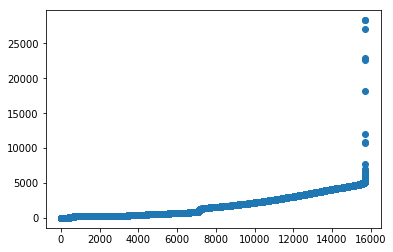

In [40]:
x, y = zip(*least_to_most_plot_items)
plt.scatter(x, y)
plt.show()

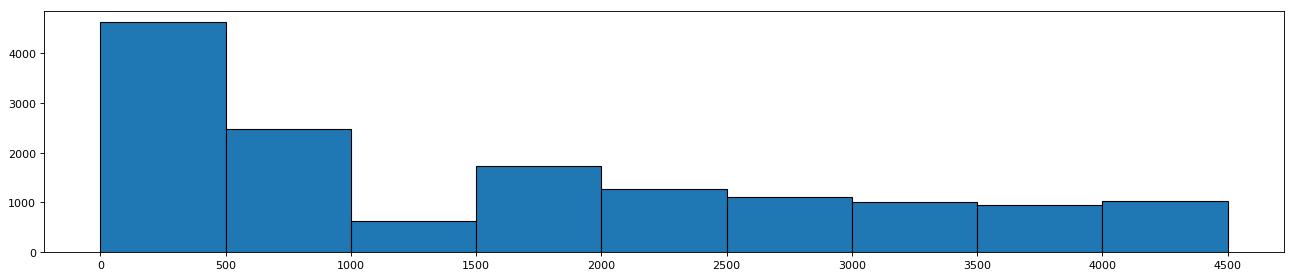

In [41]:
# bins = range(0, 10000, 1000)
bins = range(0, 5000, 500)
# bins = range(0, 1000, 100)
figure(figsize=(20, 4), dpi=80)
plt.hist(doc_length_list_orig, bins=bins, edgecolor="k")
plt.xticks(bins);

### 2 - doc_length_list_no_digits

In [42]:
#doc_length_list_no_digits.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_no_digits):
#    least_to_most_plot_items.append(item)

In [43]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [44]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_no_digits, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 3 - doc_length_list_no_tri

In [45]:
#doc_length_list_no_tri.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_no_tri):
#    least_to_most_plot_items.append(item)

In [46]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [47]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_no_tri, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 4 - doc_length_list_no_bi

In [48]:
#doc_length_list_no_bi.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_no_bi):
#    least_to_most_plot_items.append(item)

In [49]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [50]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_no_bi, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 5 - doc_length_list_tokenized

In [51]:
#doc_length_list_tokenized.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_tokenized):
#    least_to_most_plot_items.append(item)

In [52]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [53]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_tokenized, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 6 - doc_length_list_no_stop

In [54]:
#doc_length_list_tokenized.sort()
#least_to_most_plot_items = []
#for item in enumerate(doc_length_list_tokenized):
#    least_to_most_plot_items.append(item)

In [55]:
#x, y = zip(*least_to_most_plot_items)
#plt.scatter(x, y)
#plt.show()

In [56]:
# bins = range(0, 10000, 1000)
#bins = range(0, 5000, 500)
#figure(figsize=(20, 4), dpi=80)
#plt.hist(doc_length_list_tokenized, bins=bins, edgecolor="k")
#plt.xticks(bins);

### 7 - doc_length_list_stemmed

In [57]:
doc_length_list_stemmed.sort()
least_to_most_plot_items = []
for item in enumerate(doc_length_list_stemmed):
    least_to_most_plot_items.append(item)

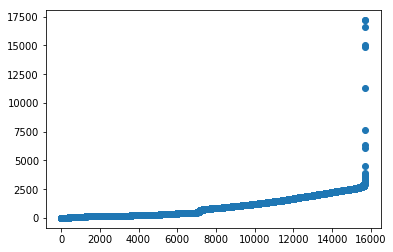

In [58]:
x, y = zip(*least_to_most_plot_items)
plt.scatter(x, y)
plt.show()

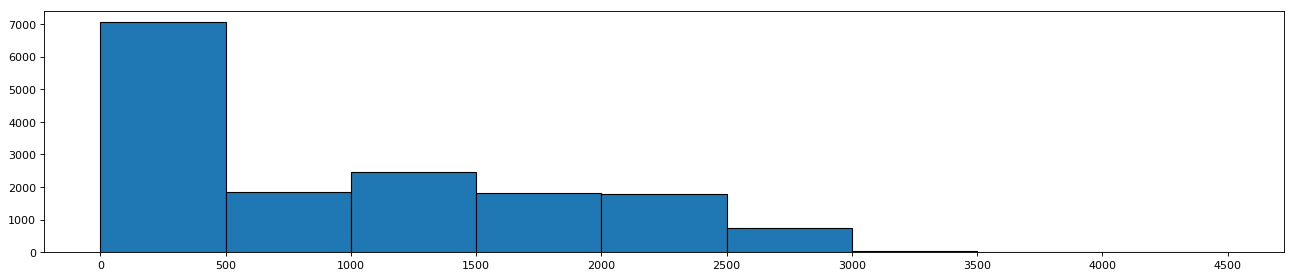

In [59]:
# bins = range(0, 10000, 1000)
bins = range(0, 5000, 500)
figure(figsize=(20, 4), dpi=80)
plt.hist(doc_length_list_stemmed, bins=bins, edgecolor="k")
plt.xticks(bins);